In [1]:
import pandas as pd
import pandasql as sql
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
from statistics import mean

# style.use('fivethirtyeight')

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
def clean_redfin_data(data):
    """
        Clean a Redfin CSV file.
        Drop Columns: ['SALE TYPE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
                       'NEXT OPEN HOUSE START TIME',
                       'NEXT OPEN HOUSE END TIME',
                       'FAVORITE',
                       'INTERESTED']
        Rename the URL Column to: "URL"
    """
    data.drop(labels=['SALE TYPE',
                      'PROPERTY TYPE',
#                       'ADDRESS', 
                      'CITY',
                      'STATE',
                      'ZIP',
                      'DAYS ON MARKET',
                      'LOCATION',
                      'STATUS',
                      'NEXT OPEN HOUSE START TIME',
                      'NEXT OPEN HOUSE END TIME',
                      'FAVORITE',
                      'INTERESTED',
                      'SOURCE',
                      'LATITUDE',
                      'LONGITUDE'
                     ],
              axis=1, inplace=True)
    data.rename(columns={'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)': 'URL'}, inplace=True)
    data.drop(data.index[-1], inplace=True)
    data.dropna(subset=["ADDRESS", "PRICE", "LOT SIZE", "BEDS"], how='all', inplace=True)
    return data


In [4]:
NS = pd.read_csv("data/redfin_wall_green_phiny.csv")
NS_1y = pd.read_csv("data/redfin_1year.csv")
NS_2y = pd.read_csv("data/redfin_2year.csv")
NS_3y = pd.read_csv("data/redfin_3year.csv")

In [5]:
NS_1y.columns

Index(['SALE TYPE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQFT', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'LISTING ID', 'FAVORITE', 'INTERESTED', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [6]:
clean_redfin_data(NS)
clean_redfin_data(NS_1y)
clean_redfin_data(NS_2y)
clean_redfin_data(NS_3y)

NS_1y.columns

Index(['ADDRESS', 'PRICE', 'BEDS', 'BATHS', 'SQFT', 'LOT SIZE', 'YEAR BUILT',
       'URL', 'LISTING ID'],
      dtype='object')

In [7]:
print("1 Year data len: {}".format(len(NS_1y)))
print("2 Year data len: {}".format(len(NS_2y)))
print("3 Year data len: {}".format(len(NS_3y)))
print("All    data len: {}".format(len(NS)))

1 Year data len: 515
2 Year data len: 961
3 Year data len: 1426
All    data len: 7247


In [8]:
for col in NS.columns:
    print("{:15}: {}".format(col, NS[col][1]))

ADDRESS        : 716 N 43rd St Unit A
PRICE          : 480000.0
BEDS           : 3.0
BATHS          : 1.0
SQFT           : 1278.0
LOT SIZE       : 5000.0
YEAR BUILT     : 1900.0
URL            : http://www.redfin.com/WA/Seattle/716-N-43rd-St-98103/unit-A/home/45681
LISTING ID     : 62938110.0


In [9]:
# NS_3y

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


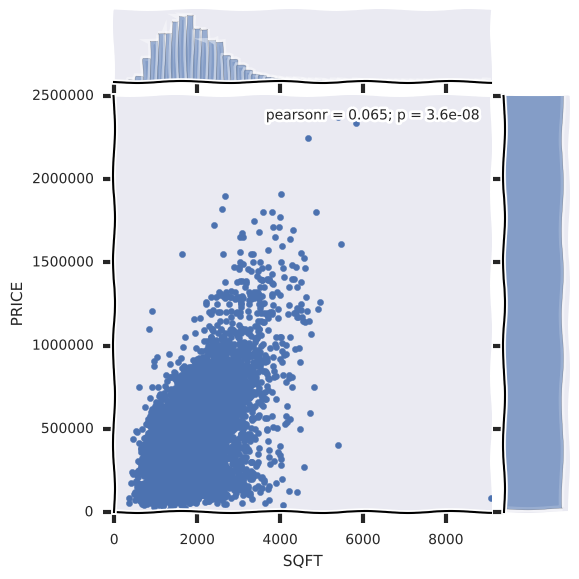

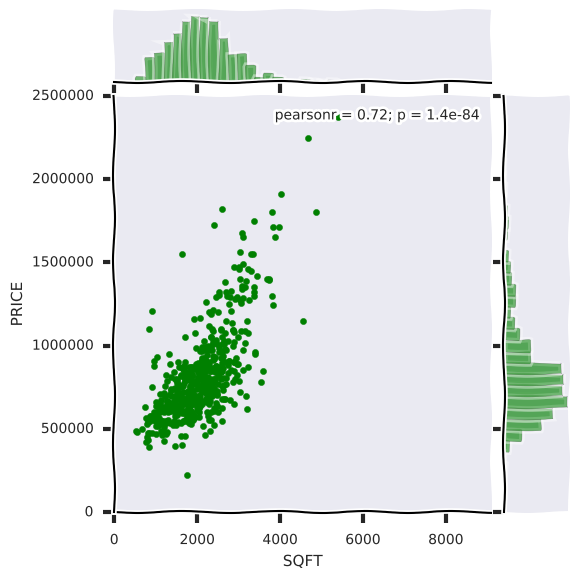

In [48]:
field = "SQFT"
sns.jointplot(x=NS[field],
              y=NS.PRICE,
              xlim=(0, NS[field].max()),
              ylim=(0, 2500000))
# sns.jointplot(x=NS_3y[field],
#               xlim=(0, NS[field].max()),
#               y=NS_3y.PRICE,
#               ylim=(0, 2500000),
#               color="green"
#              )
# sns.jointplot(x=NS_2y[field],
#               xlim=(0, NS[field].max()),
#               y=NS_2y.PRICE,
#               ylim=(0, 2500000),
#               color="green"
#              )
sns.jointplot(x=NS_1y[field],
              xlim=(0, NS[field].max()),
              y=NS_1y.PRICE,
              ylim=(0, 2500000),
              color="green",
             )

plt.show()

In [11]:
sum(pd.isnull(NS_1y['LOT SIZE']))

0

In [12]:
from sklearn.cluster import KMeans
clf_1yr = KMeans(n_clusters=1)
clf_1yr.fit(list(zip(NS_1y['LOT SIZE'], NS_1y.PRICE)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


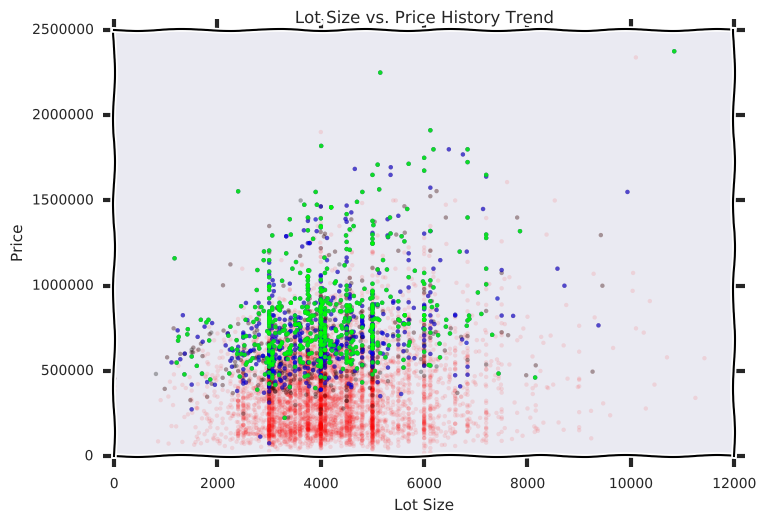

In [13]:
plt.xkcd()
plt.scatter(x=NS['LOT SIZE'],
            y=NS.PRICE,
            edgecolor="None", s=10, c="#FF0000", alpha=0.1)
plt.scatter(x=NS_3y['LOT SIZE'],
            y=NS_3y.PRICE,
            edgecolor="None", s=10, c="black", alpha=0.3)
plt.scatter(x=NS_2y['LOT SIZE'],
            y=NS_2y.PRICE,
            edgecolor="None", s=10, c="#0000FF", alpha=0.5)
plt.scatter(x=NS_1y['LOT SIZE'],
            y=NS_1y.PRICE,
            edgecolor="None", s=10, c="#00FF00", alpha=0.8)
plt.xlim(0, 12000)
plt.ylim(0, 2500000)
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel("Price")
plt.xlabel("Lot Size")
plt.title('Lot Size vs. Price History Trend')

# plt.scatter(x2, y2, edgecolor="None", s=10, c="#FF0000")
plt.show()

In [14]:
NS_1y['LOT SIZE'].describe()

count      515.000000
mean      4169.287379
std       1205.163687
min       1169.000000
25%       3359.000000
50%       4000.000000
75%       5000.000000
max      10840.000000
Name: LOT SIZE, dtype: float64

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


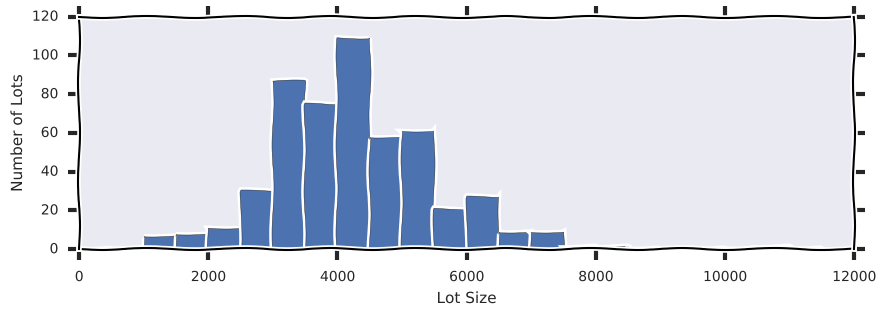

In [15]:
data = NS_1y['LOT SIZE']
plt.figure(figsize=(10, 3))
plt.hist(data,
         bins=np.arange(0,12000,500))
#         color="green")
plt.xlabel("Lot Size")
plt.ylabel("Number of Lots")
# plt.xscale('log')
plt.show()

In [16]:
len_all = len(NS)
len_1y = len(NS_1y)
len_2y = len(NS_2y)
len_3y = len(NS_3y)

field = "ADDRESS"

null_all = sum(pd.isnull(NS[field]))
null_1y = sum(pd.isnull(NS_1y[field]))
null_2y = sum(pd.isnull(NS_2y[field]))
null_3y = sum(pd.isnull(NS_3y[field]))

print("All Length: {}, Nulls: {}, Pct Null: {:2f}%".format(len_all, null_all, (null_all / len_all) * 100 ))
print("1 Y Length: {}, Nulls: {}, Pct Null: {:2f}%".format(len_1y, null_1y, (null_1y / len_1y) * 100 ))
print("2 Y Length: {}, Nulls: {}, Pct Null: {:2f}%".format(len_2y, null_2y, (null_2y / len_2y) * 100 ))
print("3 Y Length: {}, Nulls: {}, Pct Null: {:2f}%".format(len_3y, null_3y, (null_3y / len_3y) * 100 ))

All Length: 7247, Nulls: 3, Pct Null: 0.041396%
1 Y Length: 515, Nulls: 0, Pct Null: 0.000000%
2 Y Length: 961, Nulls: 0, Pct Null: 0.000000%
3 Y Length: 1426, Nulls: 0, Pct Null: 0.000000%


In [17]:
sum(pd.isnull(NS["ADDRESS"]))

3

In [18]:
len(NS_1y)

515

In [19]:
NS_2y.ADDRESS[1]

'716 N 43rd St Unit A'

In [20]:
NS.dropna(subset=["ADDRESS"], how='all', inplace=True)

In [21]:
NS_2y.reset_index(drop=True, inplace=True)
# if NS_1y.ADDRESS[0] == NS_2y.ADDRESS[0]:
#     NS_2y.drop(NS_2y.index[0], inplace=True)
# NS_2y

In [22]:
def data_minus_data(big_data, little_data, field):
    """
        Subtract one data set from another based on a field name
    """

    big_data.reset_index(drop=True, inplace=True)
    print("Len NS_2y Before: {}".format(len(big_data)))

    count = 0
    for i in range(len(little_data)):
        for j in range(len(big_data)):
            if little_data[field].loc[i] == big_data[field].loc[j]:
                print(i, j, count, "   " , little_data[field][i], " : ", big_data[field][j])
                big_data.drop(big_data.index[j], inplace=True)
                big_data.reset_index(drop=True, inplace=True)
                count += 1
                break
                
    print("Len NS_2y After: {}".format(len(big_data)))    

In [23]:
# data_minus_data(NS, NS_3y, "ADDRESS")

In [24]:
# data_minus_data(NS_3y, NS_2y, "ADDRESS")

In [25]:
# data_minus_data(NS_2y, NS_1y, "ADDRESS")

In [26]:
NS.to_csv("data/NS_all_minus_3y.csv")

In [27]:
NS.to_csv("data/NS_all_minus_3y.csv")
NS_3y.to_csv("data/NS_3y_minus_2y.csv")
NS_2y.to_csv("data/NS_2y_minus_1yrs.csv")

In [28]:
NS = pd.read_csv("data/NS_all_minus_3y.csv")
NS_1y = pd.read_csv("data/redfin_1year.csv")
NS_2y = pd.read_csv("data/NS_2y_minus_1yrs.csv")
NS_3y = pd.read_csv("data/NS_3y_minus_2y.csv")

In [35]:
def best_fit_slope_and_intercept(xs, ys):
    m = ((((mean(xs) * mean(ys))) - mean(xs * ys)) /
         ((mean(xs) * mean(xs)) - mean(xs * xs)))

    b = mean(ys) - m * mean(xs)

    return m, b

def line(m, b, data):
    output = m * data + b
    return output

In [36]:
m, b = best_fit_slope_and_intercept(NS_1y['LOT SIZE'], NS.PRICE)

print("m = {}, b = {}".format(m, b))

fit = line(m, b, NS_1y['LOT SIZE'])
# fit.describe()
plt.plot(NS_1y['LOT SIZE'], fit)

m = nan, b = nan


In [38]:
from sklearn.linear_model import LinearRegression

In [43]:
NS_1y.dropna(subset=["ADDRESS", "PRICE", "LOT SIZE", "BEDS"], how='all', inplace=True)
# NS_1y['LOT SIZE']

In [44]:
regress = LinearRegression()
regress.fit(NS_1y['LOT SIZE'], NS.PRICE)

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 7244]

/home/banksd/Documents/Projects/501-data-analysis/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


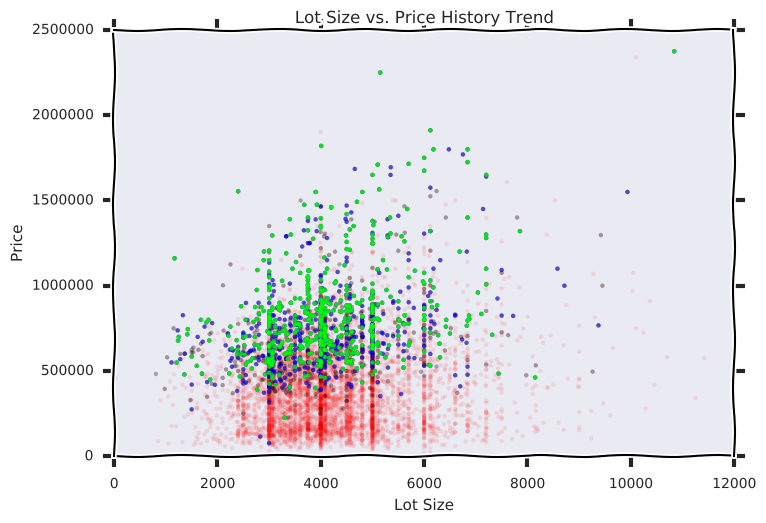

In [32]:
plt.xkcd()
plt.scatter(x=NS['LOT SIZE'],
            y=NS.PRICE,
            edgecolor="None", s=10, c="#FF0000", alpha=0.1)
plt.scatter(x=NS_3y['LOT SIZE'],
            y=NS_3y.PRICE,
            edgecolor="None", s=10, c="black", alpha=0.3)
plt.scatter(x=NS_2y['LOT SIZE'],
            y=NS_2y.PRICE,
            edgecolor="None", s=10, c="#0000FF", alpha=0.5)
plt.scatter(x=NS_1y['LOT SIZE'],
            y=NS_1y.PRICE,
            edgecolor="None", s=10, c="#00FF00", alpha=0.8)
plt.plot(NS_1y['LOT SIZE'], fit)
plt.xlim(0, 12000)
plt.ylim(0, 2500000)
# plt.xscale('log')
# plt.yscale('log')
plt.ylabel("Price")
plt.xlabel("Lot Size")
plt.title('Lot Size vs. Price History Trend')

# plt.scatter(x2, y2, edgecolor="None", s=10, c="#FF0000")
plt.show()